# WEEK 6
### Name: Manas Goel
### regno: 230968160

## EXERCISE 1 – Business Analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dfcat=pd.read_excel("Northwind.xlsx",'Categories')
dfcust=pd.read_excel("Northwind.xlsx",'Customers')
dfemp=pd.read_excel("Northwind.xlsx",'Employees')
dforddtl=pd.read_excel("Northwind.xlsx",'Order Details')
dford=pd.read_excel("Northwind.xlsx",'Orders')
dfprod=pd.read_excel("Northwind.xlsx",'Products')

## 1. Identify the top 5 and bottom 5 selling products in the company.

In [2]:
top=dforddtl.groupby(['ProductID'])['Quantity'].sum().sort_values(ascending=False)[0:5].index

In [3]:
dfprod[dfprod.ProductID.isin(top)].ProductName

15                   Pavlova
30         Gorgonzola Telino
55    Gnocchi di nonna Alice
58      Raclette Courdavault
59         Camembert Pierrot
Name: ProductName, dtype: object

In [4]:
bottom=dforddtl.groupby(['ProductID'])['Quantity'].sum().sort_values()[0:5].index

In [5]:
dfprod[dfprod.ProductID.isin(bottom)].ProductName

8               Mishi Kobe Niku
14                 Genen Shouyu
36                   Gravad lax
47                    Chocolade
66    Laughing Lumberjack Lager
Name: ProductName, dtype: object

## 2. Identify the top 5 selling products and the salesmen who sell them.

In [6]:
dford2=pd.merge(dforddtl,dford)
dford2=pd.merge(dford2,dfprod)
dford2=pd.merge(dford2,dfemp)
dford2[dford2.ProductID.isin(top)].groupby(['ProductName','LastName']).count().loc[:,['Quantity']]

Quantity
ProductName            LastName           
Camembert Pierrot      Buchanan          1
                       Callahan          1
                       Davolio           8
                       Dodsworth         3
                       Fuller            6
                       King              2
                       Leverling         8
                       Peacock           6
                       Suyama            2
Gnocchi di nonna Alice Buchanan          2
                       Callahan          1
                       Davolio           4
                       Fuller            4
                       King              1
                       Leverling         7
                       Peacock           9
                       Suyama            5
Gorgonzola Telino      Buchanan          5
                       Callahan          2
                       Davolio           7
                       Dodsworth         4
                       Fuller            2
                       King              2
                       Leverling         4
                       Peacock           5
                       Suyama            3
Pavlova                Buchanan          2
                       Callahan          3
                       Davolio          10
                       Dodsworth         1
                       Fuller            7
                       King              2
                       Leverling         3
                       Peacock           2
Raclette Courdavault   Buchanan          4
                       Callahan          4
                       Davolio           4
                       Dodsworth         4
                       Fuller            5
                       King              3
                       Leverling         3
                       Peacock           5
                       Suyama            3

## 3. Tabulate the total sales of each product, ship country wise.

In [7]:
dfcountry=pd.merge(dforddtl,dfprod)
dfcountry=pd.merge(dfcountry,dford)
dfcountry.groupby(['ProductName','ShipCountry']).sum(numeric_only=True).loc[:,['Quantity']]

Quantity
ProductName   ShipCountry          
Alice Mutton  Austria           146
              Brazil             27
              Canada              6
              France             37
              Italy              20
...                             ...
Zaanse koeken Italy               5
              Spain               5
              Sweden            121
              UK                 25
              USA                66

[784 rows x 1 columns]

## 4. Tabulate the total sales of “Boston Crab Meat” , customer wise

In [32]:
dfcountry=pd.merge(dfcountry,dfcust)
dfcountry.groupby(['ProductName','CompanyName']).sum(numeric_only=True).loc[:,['Quantity']]

Quantity
ProductName   CompanyName                        
Alice Mutton  Antonio Moreno Taquería          18
              Bon app'                         16
              Bottom-Dollar Markets             6
              Bólido Comidas preparadas        40
              Du monde entier                  15
...                                           ...
Zaanse koeken Great Lakes Food Market           6
              Morgenstern Gesundkost           12
              Ottilies Käseladen               40
              Save-a-lot Markets               60
              Wellington Importadora           15

[1255 rows x 1 columns]

## 5. Tabulate the customer’s region wise sales of products in each category.

In [9]:
dfprodxcat=pd.merge(dfprod, dfcat, on='CategoryID')

In [11]:
dfBC = dfprod.loc[dfprod['ProductName'] == 'Boston Crab Meat', 'ProductID'].values[0]
dfBCord = dforddtl[dforddtl['ProductID'] == dfBC]
dfBCorddtl = pd.merge(dfBCord, dfprod, on='ProductID')
dfBCord= pd.merge(dfBCorddtl, dford, on='OrderID')
alldetails = pd.merge(dfprod, dforddtl, on='ProductID')
alldetailsemp = pd.merge(alldetails, dford, on='OrderID')
alldetailsempname=pd.merge(alldetailsemp, dfemp, on='EmployeeID')
alldetailsempnamecat=pd.merge(alldetailsempname, dfcat, on='CategoryID')
pt = pd.pivot_table(
    alldetailsempnamecat,
    values='Quantity',
    index='ShipRegion',
    columns='CategoryName',
    aggfunc='sum',
    fill_value=0
)
print(pt)

CategoryName   Beverages  Condiments  Confections  Dairy Products  \
ShipRegion                                                          
AK                   104          33          185              42   
BC                   149         111          238             204   
CA                    21          44           40               0   
Co. Cork             200         180           91             387   
DF                    10           0            0               4   
Essex                112           0          129             142   
ID                   827         390          709             791   
Isle of Wight        100          50            7              76   
Lara                  43          50          179             238   
MT                     7          10            0               0   
NM                   232          98          279             340   
Nueva Esparta        207          91          234             109   
OR                   137          

## 6. Visualize the customer’s region wise sales of products in each category using an appropriate chart.

<Axes: xlabel='ShipRegion'>

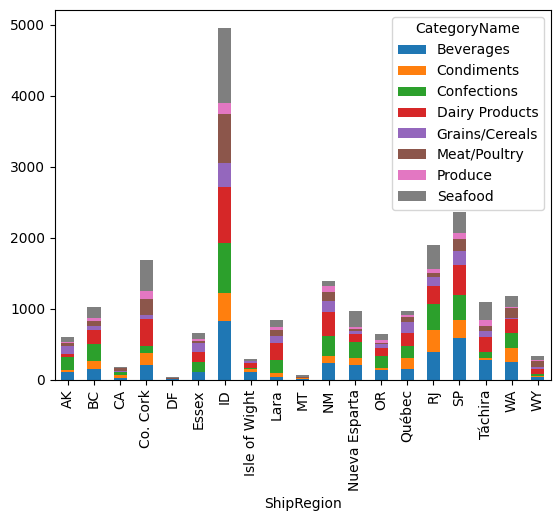

In [13]:
pt.plot(kind='bar', stacked=True)


## 7. Visualize the total sales of each product, employee wise with an appropriate chart.

<Axes: xlabel='ProductName'>

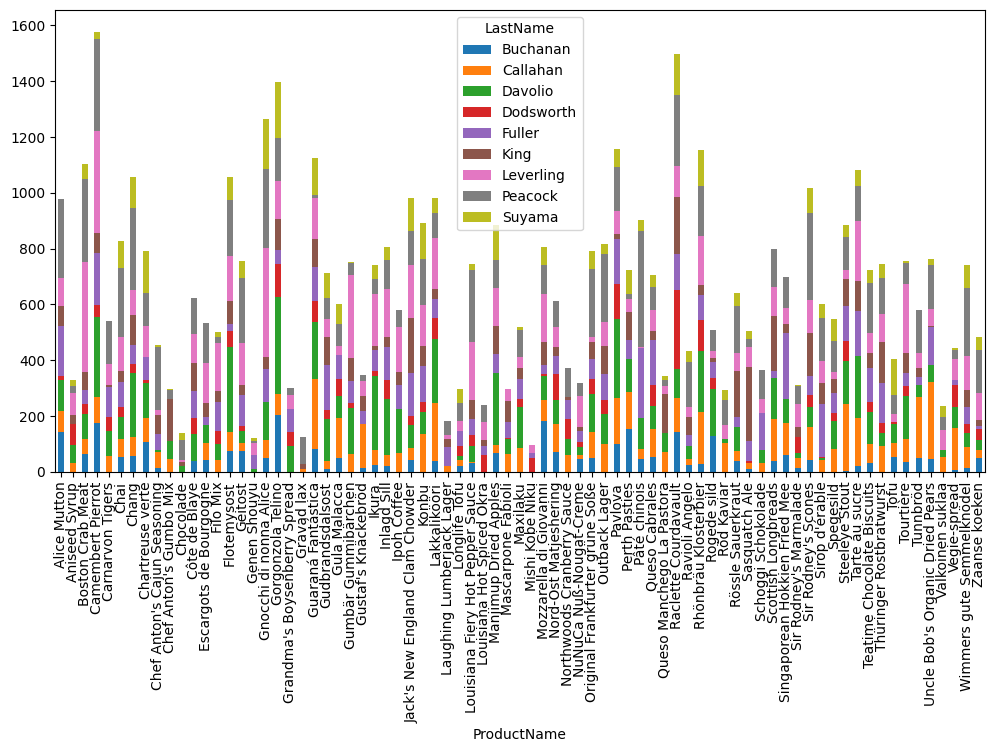

In [30]:
pt = pd.pivot_table(
    alldetailsempname,
    values='Quantity',
    index='ProductName',
    columns='LastName',
    aggfunc='sum',
    fill_value=0
)
pt.plot(kind='bar', stacked=True,figsize=(12,6))

## 8. Tabulate the total sales of each product, category-wise as a percentage of the entire sales.

In [61]:
alldetailsempnamecat['Percentage']=alldetailsempnamecat.Quantity/alldetailsempnamecat.groupby(['ProductName']).sum(numeric_only=True).Quantity.sum()*100
pt = pd.pivot_table(
    alldetailsempnamecat,
    values='Percentage',
    index='ProductName',
    columns='CategoryName',
    aggfunc='sum',
    fill_value=0
)
print(pt)


CategoryName                     Beverages  Condiments  Confections  \
ProductName                                                           
Alice Mutton                           0.0    0.000000     0.000000   
Aniseed Syrup                          0.0    0.639164     0.000000   
Boston Crab Meat                       0.0    0.000000     0.000000   
Camembert Pierrot                      0.0    0.000000     0.000000   
Carnarvon Tigers                       0.0    0.000000     0.000000   
...                                    ...         ...          ...   
Uncle Bob's Organic Dried Pears        0.0    0.000000     0.000000   
Valkoinen suklaa                       0.0    0.000000     0.457938   
Vegie-spread                           0.0    0.867159     0.000000   
Wimmers gute Semmelknödel              0.0    0.000000     0.000000   
Zaanse koeken                          0.0    0.000000     0.945106   

CategoryName                     Dairy Products  Grains/Cereals  Meat/Poultr

## 9. Visualize the total sales of each product, category-wise as a percentage of the entire sales

<Axes: xlabel='ProductName'>

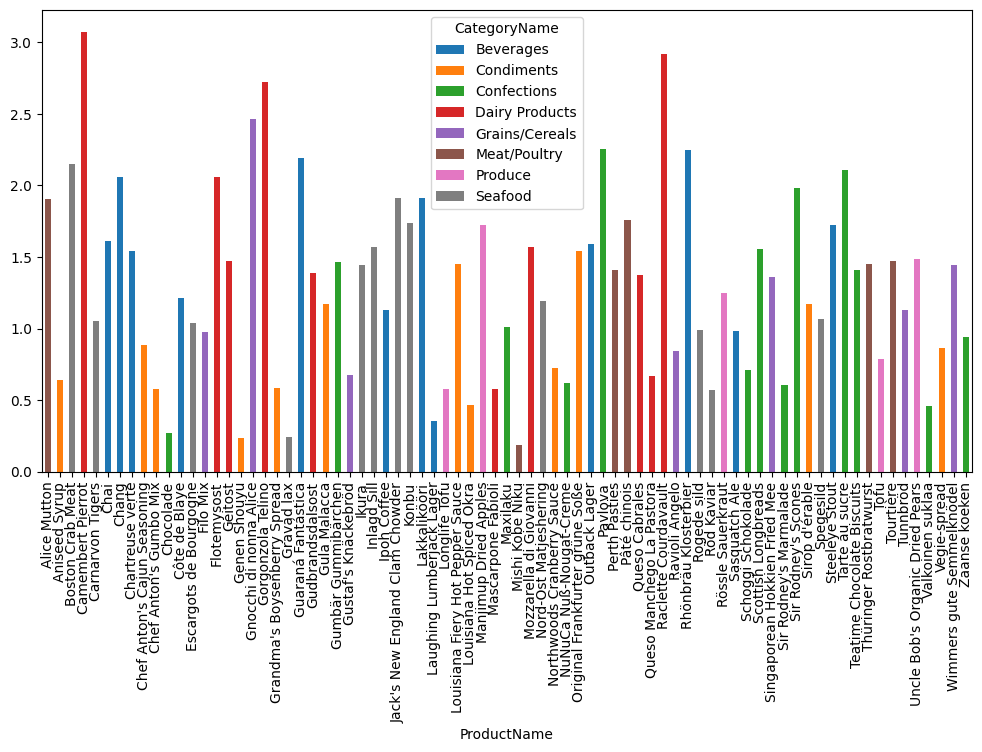

In [62]:
pt.plot(kind='bar', stacked=True,figsize=(12,6))

## 10. Summarize the sales for each product, year wise and visualize the same in an appropriate chart.

In [79]:
alldetailsempnamecat['Year']=pd.DatetimeIndex(alldetailsempnamecat.OrderDate).year

In [87]:
alldetailsempnamecat.groupby(['ProductName','Year']).sum(numeric_only=True).loc[:,['Quantity']]

Quantity
ProductName               Year          
Alice Mutton              1996       234
                          1997       527
                          1998       217
Aniseed Syrup             1996        30
                          1997       190
...                                  ...
Wimmers gute Semmelknödel 1997       281
                          1998       335
Zaanse koeken             1996        16
                          1997       359
                          1998       110

[227 rows x 1 columns]

In [97]:
dfsum=alldetailsempnamecat.groupby(['ProductName','Year']).sum(numeric_only=True).loc[:,['Quantity']]

In [100]:
pt = pd.pivot_table(
    dfsum,
    values='Quantity',
    index='ProductName',
    columns='Year',
    aggfunc='sum',
    fill_value=0
)
print(pt)

Year                             1996  1997  1998
ProductName                                      
Alice Mutton                      234   527   217
Aniseed Syrup                      30   190   108
Boston Crab Meat                  204   596   303
Camembert Pierrot                 370   665   542
Carnarvon Tigers                  106   282   151
...                               ...   ...   ...
Uncle Bob's Organic Dried Pears    25   324   414
Valkoinen suklaa                   30   150    55
Vegie-spread                      109   189   147
Wimmers gute Semmelknödel         124   281   335
Zaanse koeken                      16   359   110

[77 rows x 3 columns]


<Axes: xlabel='ProductName'>

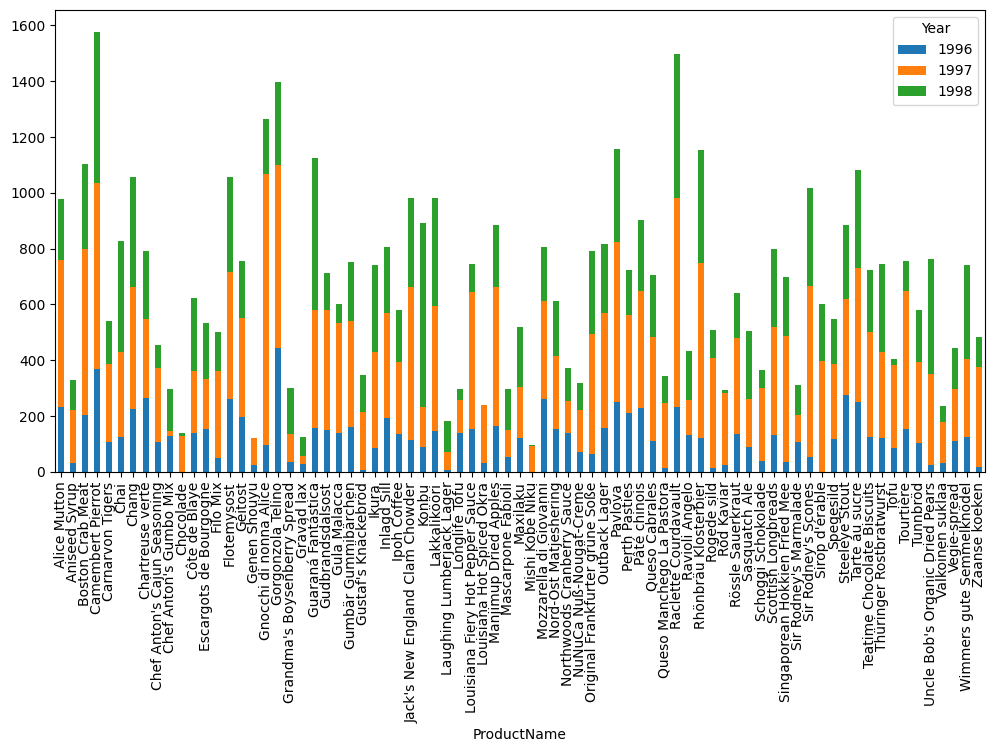

In [101]:
pt.plot(kind='bar', stacked=True,figsize=(12,6))